In [13]:
import pandas as pd
from IPython.display import HTML
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv('train.csv')

In [9]:
HTML(df.head(10).to_html())

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived
5,5,no,adult,529642,38.1,56.0,32.0,normal,normal,bright_pink,less_3_sec,depressed,hypomotile,none,none,more_1_liter,5.0,decreased,firm,49.0,8.0,cloudy,2.8,no,0,0,0,yes,lived
6,6,yes,adult,534787,38.3,36.0,16.0,cool,reduced,normal_pink,less_3_sec,severe_pain,normal,slight,none,more_1_liter,2.0,decreased,NaN,43.0,75.0,cloudy,1.0,no,3111,0,0,yes,euthanized
7,7,no,adult,529461,39.2,114.0,24.0,cool,reduced,pale_cyanotic,more_3_sec,mild_pain,hypomotile,moderate,slight,none,4.5,absent,distend_small,57.0,7.6,serosanguious,4.5,yes,2207,0,0,yes,died
8,8,no,adult,528742,37.4,48.0,12.0,cool,reduced,normal_pink,less_3_sec,alert,hypermotile,slight,slight,more_1_liter,7.0,normal,firm,40.0,7.8,cloudy,2.6,no,0,0,0,yes,lived
9,9,yes,adult,529640,38.3,129.0,48.0,cool,reduced,pale_pink,less_3_sec,depressed,absent,moderate,slight,none,4.4,NaN,NaN,57.0,4.9,cloudy,2.9,yes,3209,0,0,yes,died


In [52]:
# checking if any of the rows are null
len(df[df.isnull().all(axis=1)])

0

In [43]:
# checking for duplicate rows
len(df[df.duplicated()])

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1235 non-null   int64  
 1   surgery                1235 non-null   object 
 2   age                    1235 non-null   object 
 3   hospital_number        1235 non-null   int64  
 4   rectal_temp            1235 non-null   float64
 5   pulse                  1235 non-null   float64
 6   respiratory_rate       1235 non-null   float64
 7   temp_of_extremities    1196 non-null   object 
 8   peripheral_pulse       1175 non-null   object 
 9   mucous_membrane        1214 non-null   object 
 10  capillary_refill_time  1229 non-null   object 
 11  pain                   1191 non-null   object 
 12  peristalsis            1215 non-null   object 
 13  abdominal_distention   1212 non-null   object 
 14  nasogastric_tube       1155 non-null   object 
 15  naso

In [ ]:
df.nunique()

id                       1235
surgery                     2
age                         2
hospital_number           255
rectal_temp                43
pulse                      50
respiratory_rate           37
temp_of_extremities         4
peripheral_pulse            4
mucous_membrane             6
capillary_refill_time       3
pain                        6
peristalsis                 5
abdominal_distention        4
nasogastric_tube            3
nasogastric_reflux          4
nasogastric_reflux_ph      26
rectal_exam_feces           5
abdomen                     5
packed_cell_volume         49
total_protein              83
abdomo_appearance           3
abdomo_protein             54
surgical_lesion             2
lesion_1                   57
lesion_2                    4
lesion_3                    2
cp_data                     2
outcome                     3
dtype: int64

/Users/dhruvinandipara/anaconda3/envs/test_env/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


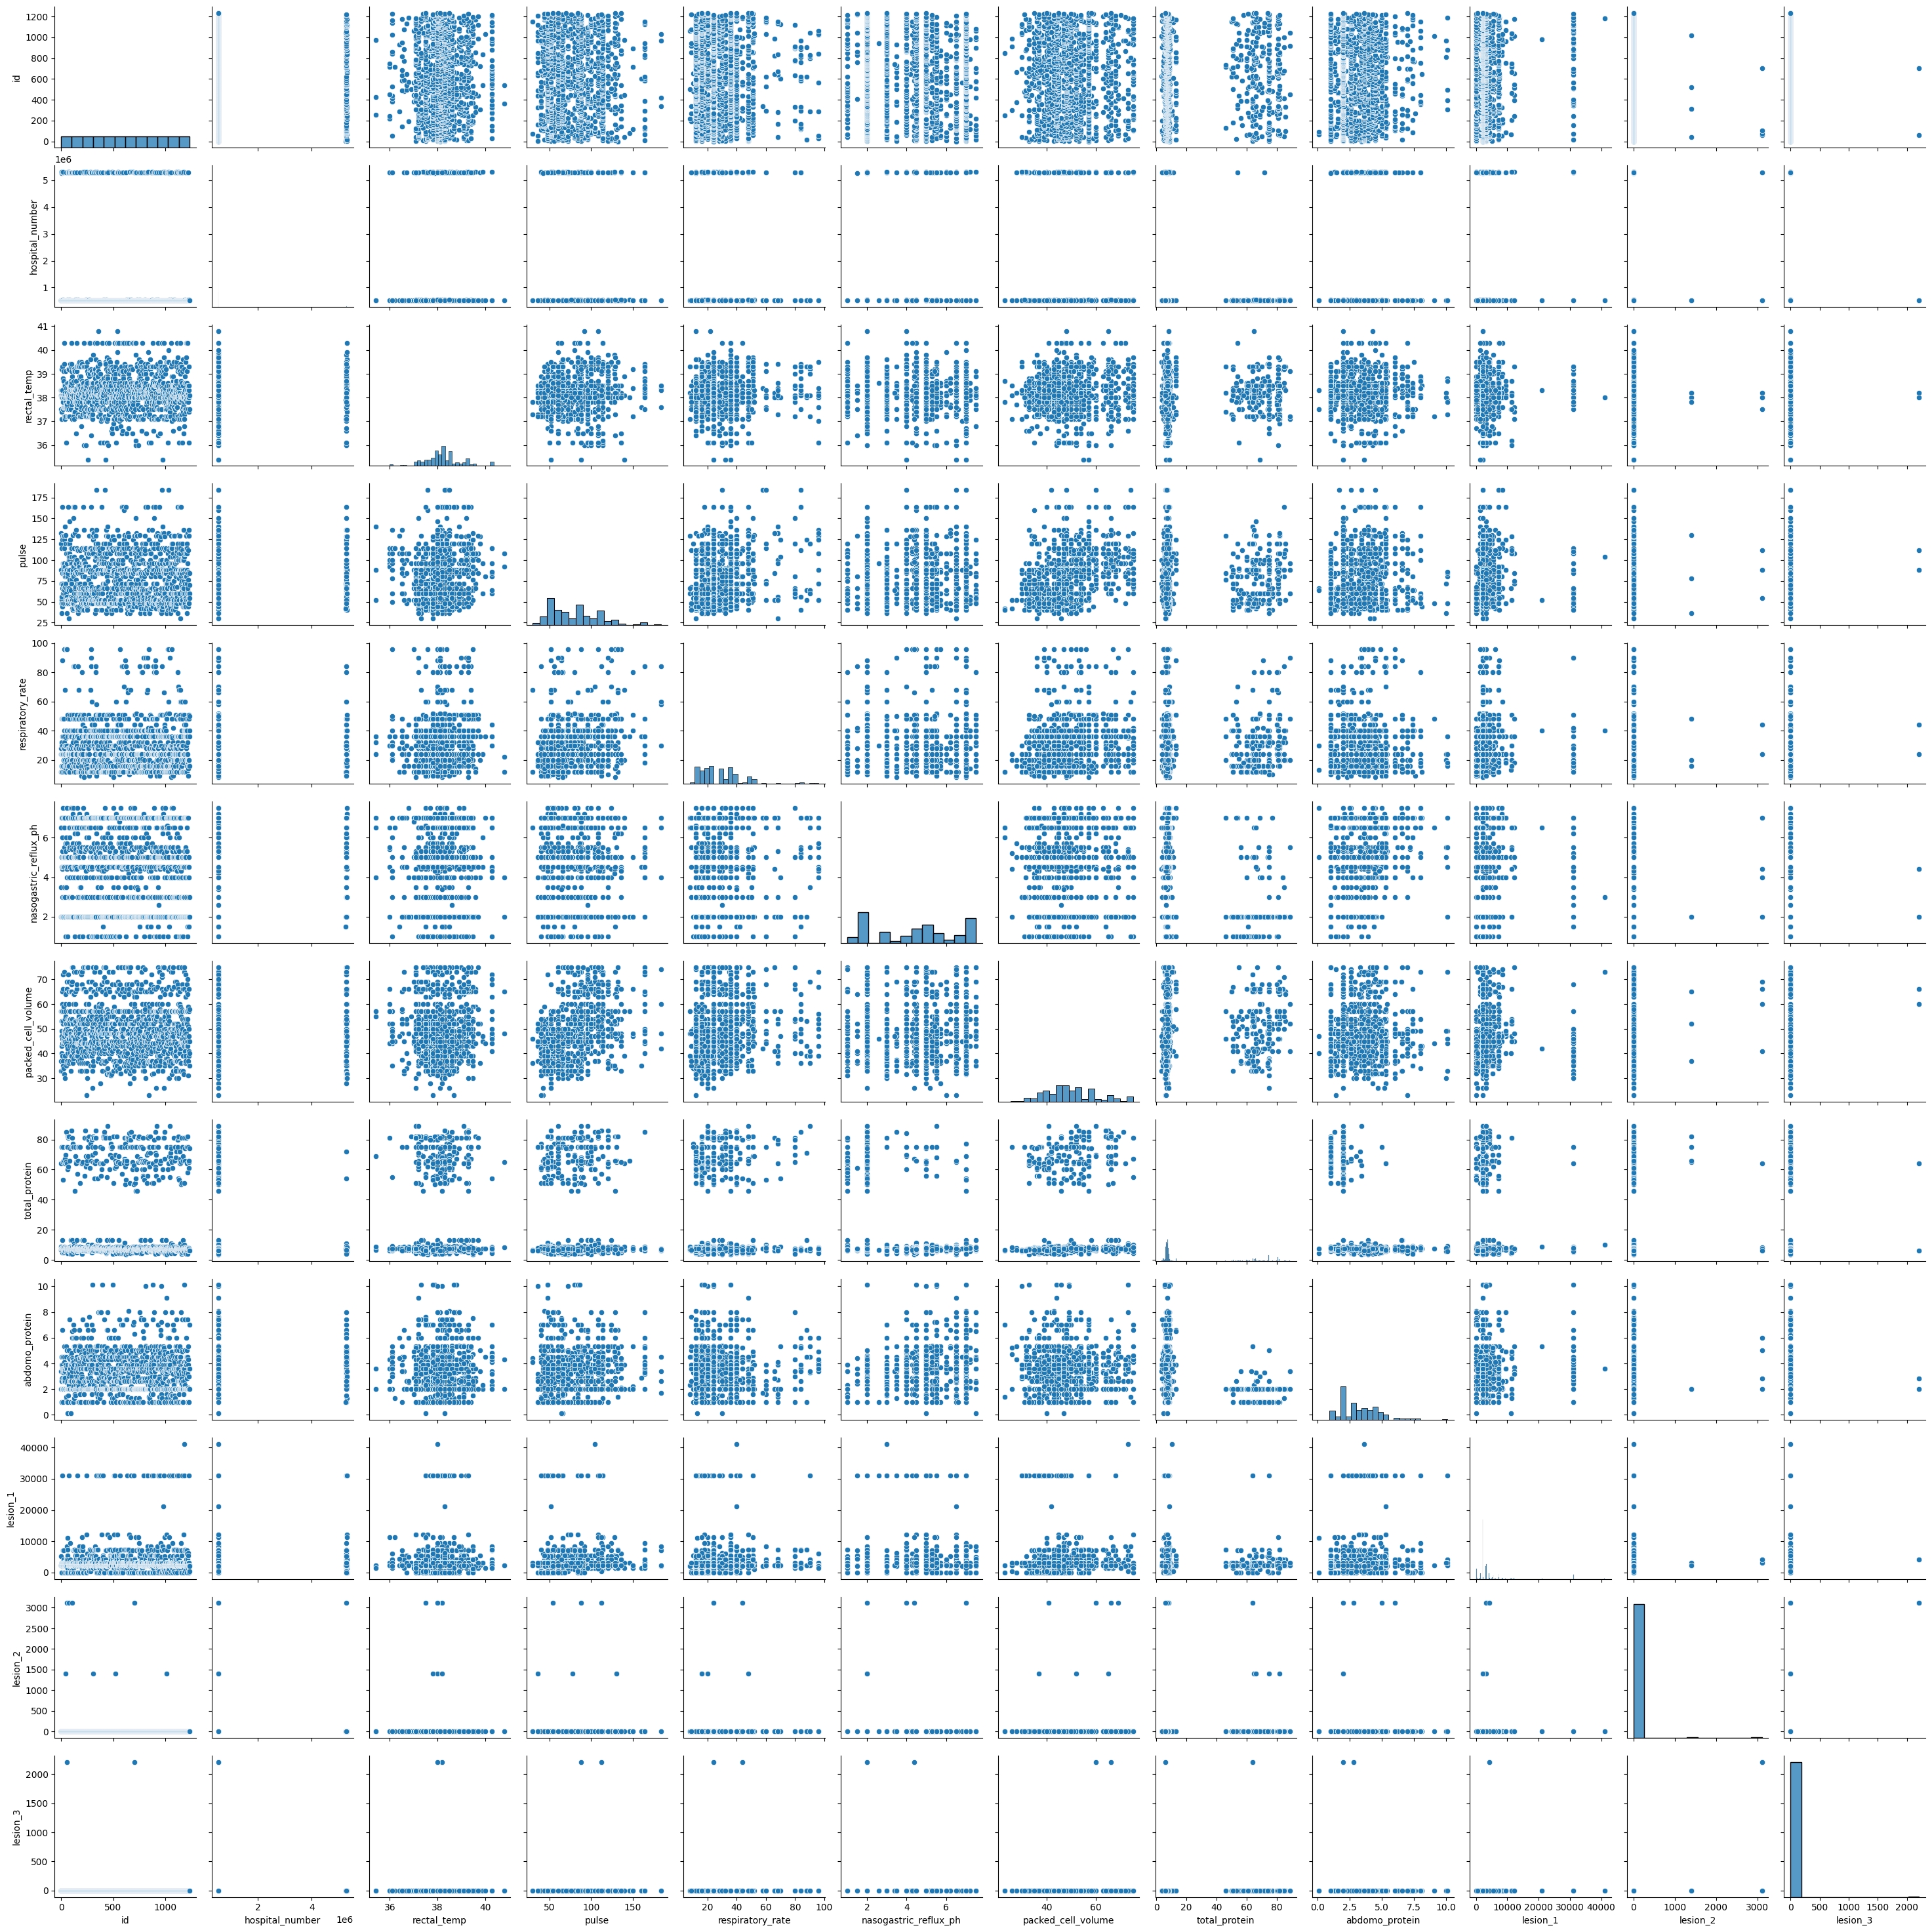

In [ ]:
sns.pairplot(df)

In [79]:
# list of Categorical columns in data frame
categorical_columns = ['age', 'surgery', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain','peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']

age
adult    1160
young      75
Name: count, dtype: int64
surgery
yes    887
no     348
Name: count, dtype: int64
temp_of_extremities
cool      700
normal    324
cold      121
warm       51
Name: count, dtype: int64
peripheral_pulse
reduced      724
normal       429
absent        18
increased      4
Name: count, dtype: int64
mucous_membrane
pale_pink        284
normal_pink      260
pale_cyanotic    250
bright_red       211
dark_cyanotic    121
bright_pink       88
Name: count, dtype: int64
capillary_refill_time
less_3_sec    834
more_3_sec    393
3               2
Name: count, dtype: int64
pain
depressed       429
mild_pain       408
severe_pain     146
extreme_pain    120
alert            87
slight            1
Name: count, dtype: int64
peristalsis
hypomotile       664
absent           444
normal            53
hypermotile       53
distend_small      1
Name: count, dtype: int64
abdominal_distention
moderate    543
slight      346
none        212
severe      111
Name: count, dtype: int6

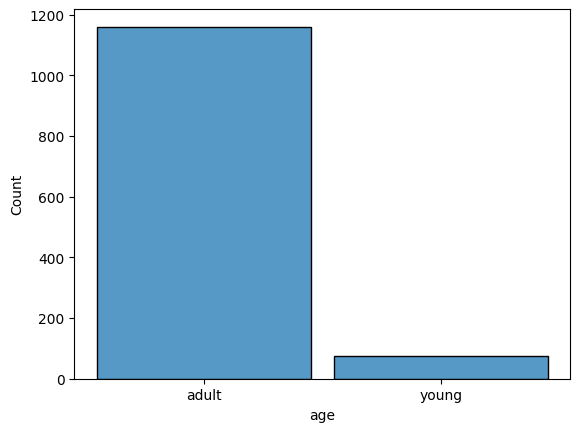

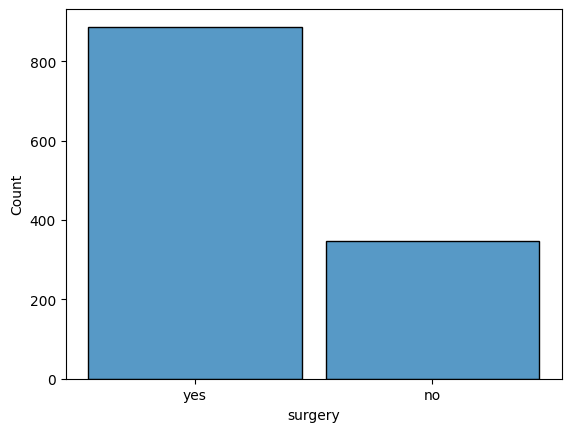

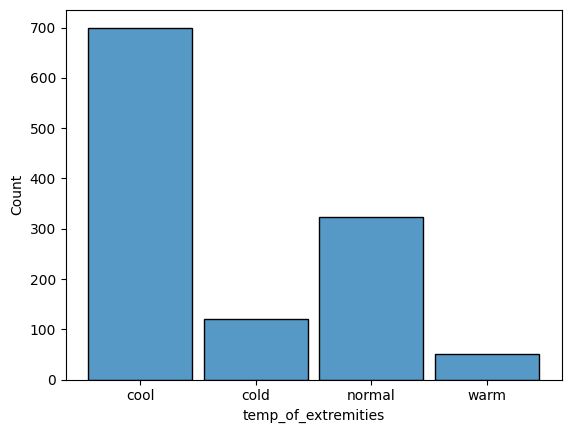

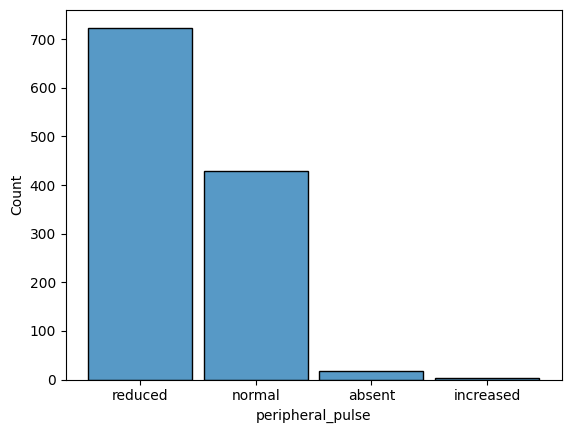

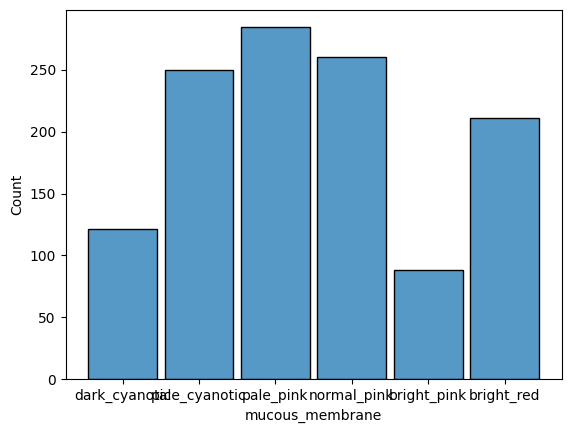

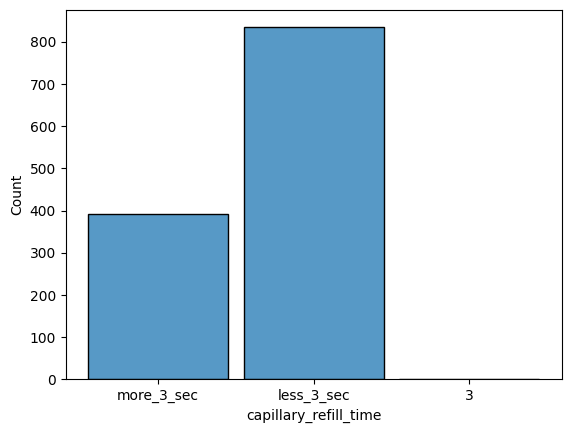

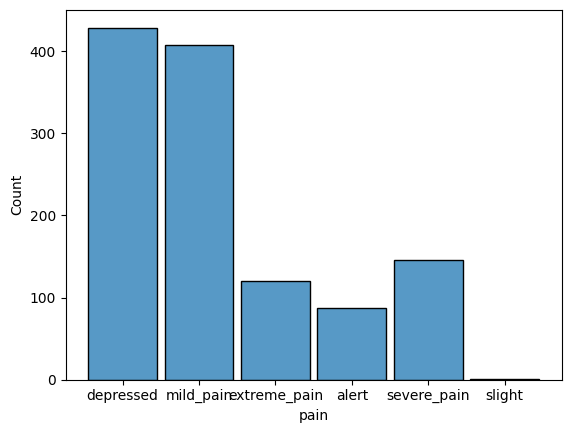

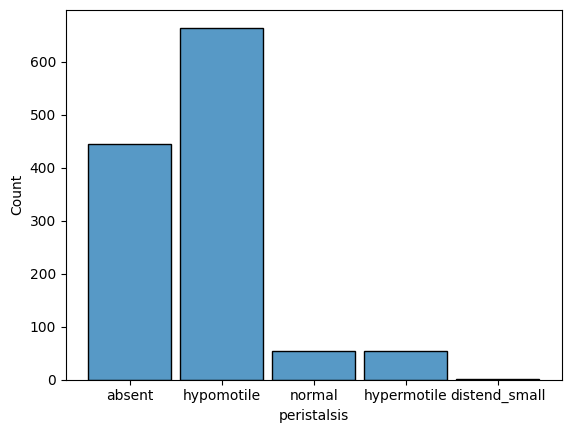

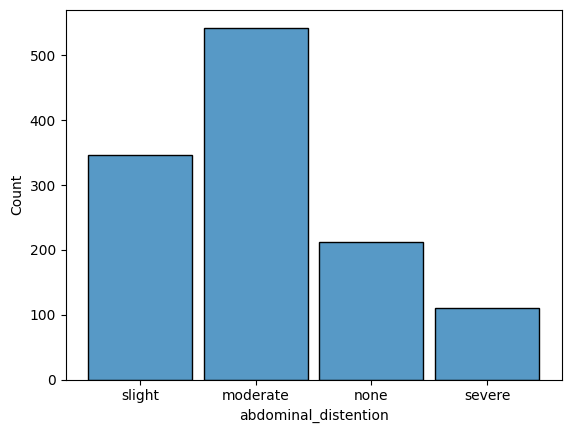

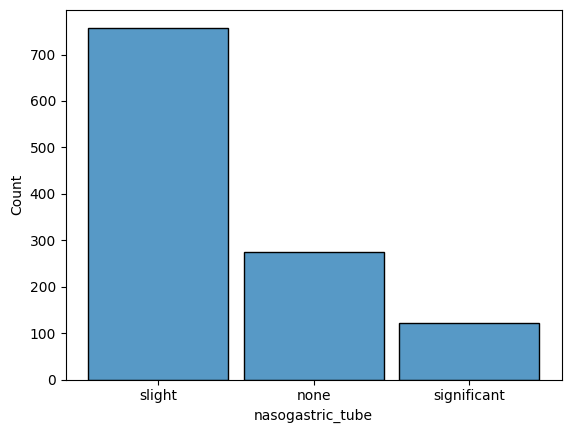

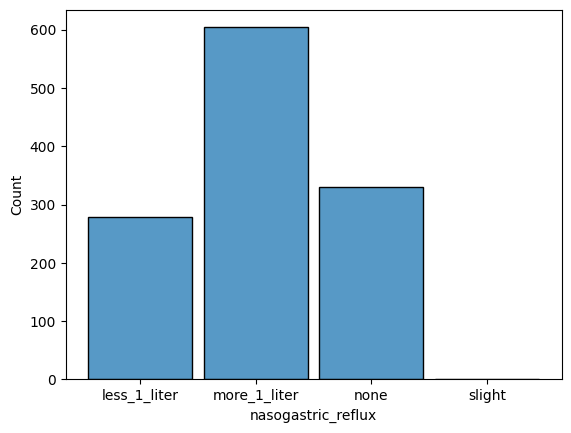

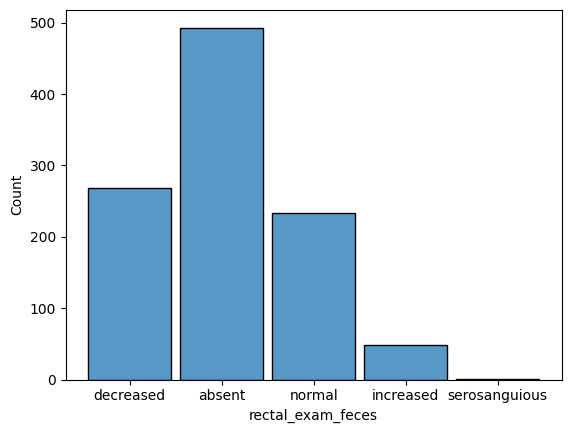

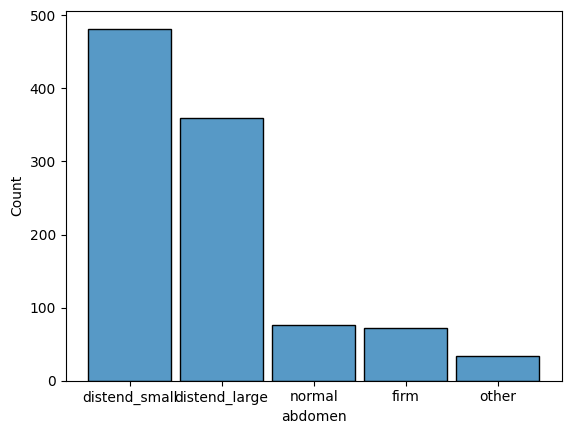

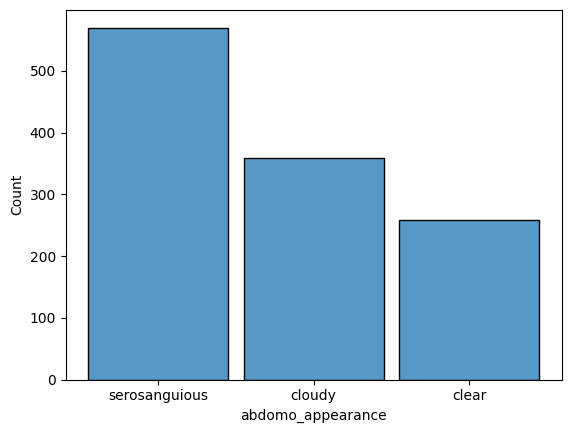

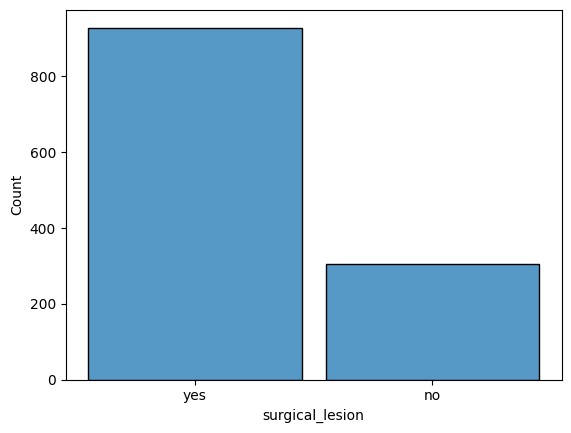

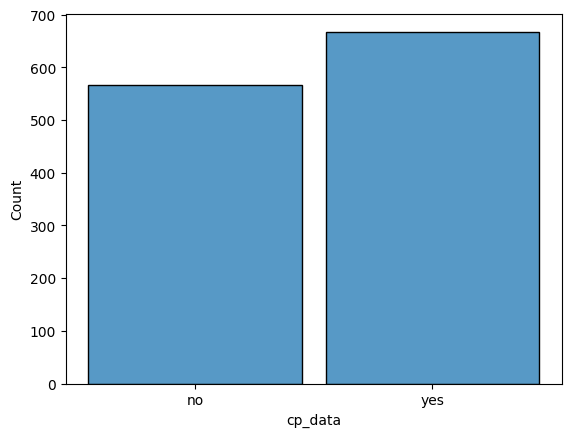

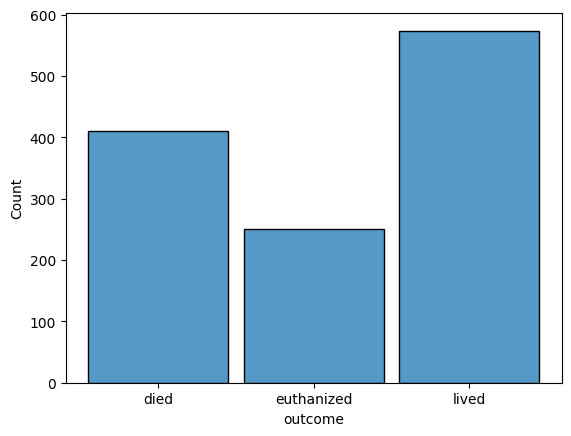

In [80]:
for column in categorical_columns:
    plt.figure()
    print(df[column].value_counts())
    sns.histplot(df[column], shrink=0.9)
    print("=========================")

In [81]:
dummies = pd.get_dummies(df[categorical_columns], prefix=categorical_columns, drop_first=True)

In [82]:
# (note to self) see if there is way to avoid this step 
dummies = dummies.replace([False, True], [0, 1])

In [83]:
dummies.head()

,age_young,surgery_yes,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_reflux_slight,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes,outcome_euthanized,outcome_lived
0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1
4,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1


In [93]:
numeric_data = df.select_dtypes(['int', 'float'])

In [94]:
numeric_data.drop(['id', 'hospital_number'], axis=1, inplace=True)

In [96]:
numeric_data.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0


In [102]:
df_final = pd.concat([numeric_data, dummies], axis=1)

In [103]:
df_final.head()

,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3,age_young,surgery_yes,temp_of_extremities_cool,temp_of_extremities_normal,temp_of_extremities_warm,peripheral_pulse_increased,peripheral_pulse_normal,peripheral_pulse_reduced,mucous_membrane_bright_red,mucous_membrane_dark_cyanotic,mucous_membrane_normal_pink,mucous_membrane_pale_cyanotic,mucous_membrane_pale_pink,capillary_refill_time_less_3_sec,capillary_refill_time_more_3_sec,pain_depressed,pain_extreme_pain,pain_mild_pain,pain_severe_pain,pain_slight,peristalsis_distend_small,peristalsis_hypermotile,peristalsis_hypomotile,peristalsis_normal,abdominal_distention_none,abdominal_distention_severe,abdominal_distention_slight,nasogastric_tube_significant,nasogastric_tube_slight,nasogastric_reflux_more_1_liter,nasogastric_reflux_none,nasogastric_reflux_slight,rectal_exam_feces_decreased,rectal_exam_feces_increased,rectal_exam_feces_normal,rectal_exam_feces_serosanguious,abdomen_distend_small,abdomen_firm,abdomen_normal,abdomen_other,abdomo_appearance_cloudy,abdomo_appearance_serosanguious,surgical_lesion_yes,cp_data_yes,outcome_euthanized,outcome_lived
0,38.1,132.0,24.0,6.5,57.0,8.5,3.4,2209,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
1,37.5,88.0,12.0,2.0,33.0,64.0,2.0,2208,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0
2,38.3,120.0,28.0,3.5,37.0,6.4,3.4,5124,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
3,37.1,72.0,30.0,2.0,53.0,7.0,3.9,2208,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,1,0,1
4,38.0,52.0,48.0,7.0,47.0,7.3,2.6,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1
